# Tutorial: Bond percolation on linear chains and square lattices

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import percolate

## A linear chain bond percolation setting with spanning cluster detection

In [2]:
# Generate linear chain graph with auxiliary nodes for spanning cluster detection
graph = percolate.spanning_1d_chain(length=10)

### Evolution of one sample state (realization)

{'moments': array([ 9.,  9.,  9.,  9.,  9.]), 'M': 9, 'N': 10, 'max_cluster_size': 1, 'n': 0, 'has_spanning_cluster': False}
{'moments': array([ 8.,  8.,  8.,  8.,  8.]), 'M': 9, 'N': 10, 'max_cluster_size': 2, 'n': 1, 'has_spanning_cluster': False, 'edge': (4, 5)}
{'moments': array([ 7.,  7.,  7.,  7.,  7.]), 'M': 9, 'N': 10, 'max_cluster_size': 3, 'n': 2, 'has_spanning_cluster': False, 'edge': (5, 6)}
{'moments': array([  6.,   7.,   9.,  13.,  21.]), 'M': 9, 'N': 10, 'max_cluster_size': 3, 'n': 3, 'has_spanning_cluster': False, 'edge': (1, 2)}
{'moments': array([  5.,   7.,  11.,  19.,  35.]), 'M': 9, 'N': 10, 'max_cluster_size': 3, 'n': 4, 'has_spanning_cluster': False, 'edge': (9, 10)}
{'moments': array([  4.,   7.,  13.,  25.,  49.]), 'M': 9, 'N': 10, 'max_cluster_size': 3, 'n': 5, 'has_spanning_cluster': False, 'edge': (7, 8)}
{'moments': array([  3.,   6.,  12.,  24.,  48.]), 'M': 9, 'N': 10, 'max_cluster_size': 4, 'n': 6, 'has_spanning_cluster': False, 'edge': (3, 4)}
{'moment

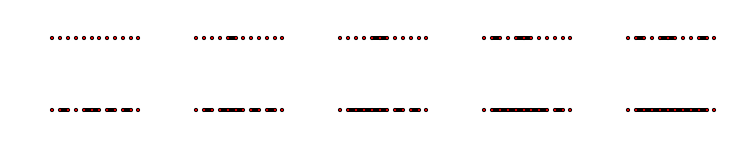

In [3]:
edges = list()
fig, axes = plt.subplots(figsize=(10.0, 2.0), ncols=5, nrows=2, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(graph)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
    nx.draw(
        graph,
        ax=axes[i],
        edgelist=edges,
        width=4,
        pos={node: (node, 0) for node in graph.nodes_iter()},
        node_size=10,
    )
    print(sample_state)
plt.tight_layout(0)
plt.show()

The terminal nodes are the auxiliary nodes for spanning cluster detection.

## A 3x3 square grid bond percolation setting with spanning cluster detection

In [4]:
graph = percolate.spanning_2d_grid(3)

### Evolution of one sample state (realization)

{'moments': array([ 8.,  8.,  8.,  8.,  8.]), 'M': 12, 'N': 9, 'max_cluster_size': 1, 'n': 0, 'has_spanning_cluster': False}
{'moments': array([ 7.,  7.,  7.,  7.,  7.]), 'M': 12, 'N': 9, 'max_cluster_size': 2, 'n': 1, 'has_spanning_cluster': False, 'edge': ((3, 2), (3, 1))}
{'moments': array([ 6.,  6.,  6.,  6.,  6.]), 'M': 12, 'N': 9, 'max_cluster_size': 3, 'n': 2, 'has_spanning_cluster': False, 'edge': ((3, 2), (2, 2))}
{'moments': array([ 5.,  5.,  5.,  5.,  5.]), 'M': 12, 'N': 9, 'max_cluster_size': 4, 'n': 3, 'has_spanning_cluster': True, 'edge': ((1, 2), (2, 2))}
{'moments': array([  4.,   5.,   7.,  11.,  19.]), 'M': 12, 'N': 9, 'max_cluster_size': 4, 'n': 4, 'has_spanning_cluster': True, 'edge': ((1, 0), (1, 1))}
{'moments': array([  3.,   5.,  11.,  29.,  83.]), 'M': 12, 'N': 9, 'max_cluster_size': 4, 'n': 5, 'has_spanning_cluster': True, 'edge': ((2, 0), (1, 0))}
{'moments': array([   2.,    5.,   17.,   65.,  257.]), 'M': 12, 'N': 9, 'max_cluster_size': 4, 'n': 6, 'has_span

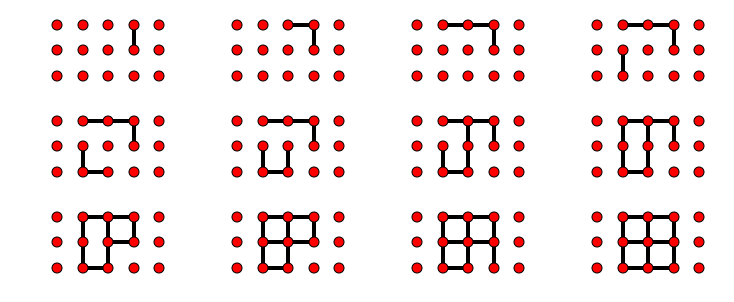

In [5]:
edges = list()
fig, axes = plt.subplots(figsize=(10.0, 4.0), ncols=4, nrows=3, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(graph)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
        nx.draw(
            graph,
            ax=axes[i - 1],
            edgelist=edges,
            width=4,
            pos={node: node for node in graph.nodes_iter()},
            node_size=100,
        )
    print(sample_state)
plt.tight_layout(0)
plt.show()

The left-hand and right-hand outermost nodes are the auxiliary nodes for spanning cluster detection.

## Single run bond percolation statistics on the linear chain

In [6]:
runs = 6
ls = [10, 100, 1000, 10000]

In [7]:
graphs = [ percolate.spanning_1d_chain(l) for l in ls ]
single_runs = [
    [ percolate.single_run_arrays(graph=graph) for _ in range(runs) ]
    for graph in graphs
]

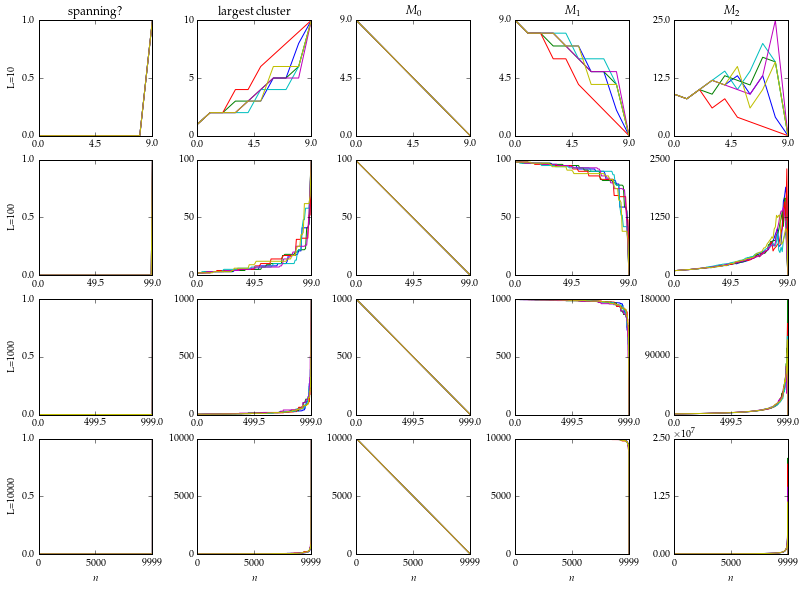

In [8]:
fig, axes = plt.subplots(nrows=len(ls), ncols=5, squeeze=True, figsize=(11.0, 8.0))
for l_index, l in enumerate(ls):
    for single_run in single_runs[l_index]:
        axes[l_index, 0].plot(single_run['has_spanning_cluster'], rasterized=True)
        axes[l_index, 1].plot(single_run['max_cluster_size'], rasterized=True)    
        for k in range(3):
            axes[l_index, k + 2].plot(single_run['moments'][k], rasterized=True)
            
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    
    for ax in axes[l_index, :]:
        num_edges = single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
#    ax.set_ylim(ymin=0.0)
    
plt.tight_layout(0)
plt.show()

## Single run bond percolation statistics on square grids

In [9]:
runs = 6
ls = [3, 10, 32, 100, 316]

In [10]:
graphs = [ percolate.spanning_2d_grid(l) for l in ls ]
single_runs = [
    [ percolate.single_run_arrays(graph=graph) for _ in range(runs) ]
    for graph in graphs
]

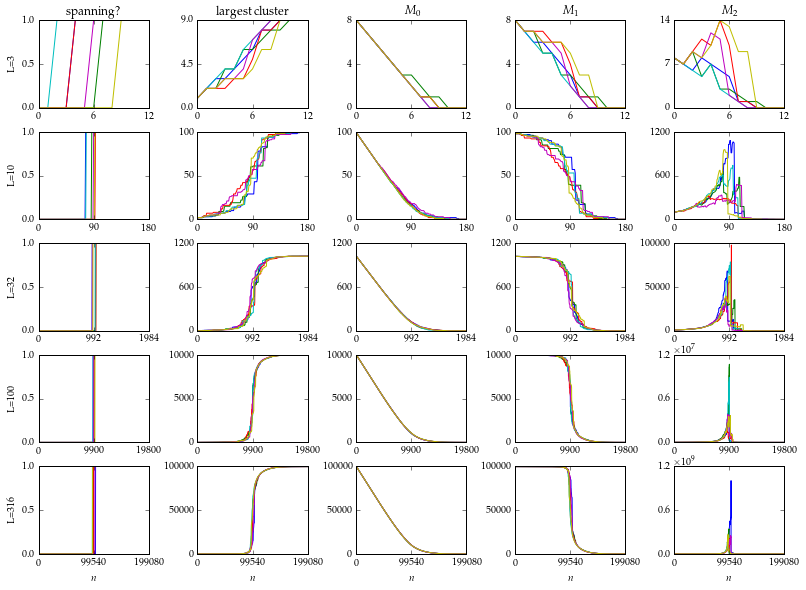

In [11]:
fig, axes = plt.subplots(nrows=len(ls), ncols=5, squeeze=True, figsize=(11.0, 8.0))
for l_index, l in enumerate(ls):
    for single_run in single_runs[l_index]:
        axes[l_index, 0].plot(single_run['has_spanning_cluster'], rasterized=True)
        axes[l_index, 1].plot(single_run['max_cluster_size'], rasterized=True)    
        for k in range(3):
            axes[l_index, k + 2].plot(single_run['moments'][k], rasterized=True)
            
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    
    for ax in axes[l_index, :]:
        num_edges = single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
#    ax.set_ylim(ymin=0.0)
    
plt.tight_layout(0)
plt.show()

## Microcanonical ensemble averages of bond percolation on the linear chain

In [12]:
runs_1d = 40
ls_1d = [10, 100, 1000, 10000]

In [13]:
graphs_1d = [ percolate.spanning_1d_chain(l) for l in ls_1d ]
microcanonical_averages_1d = [
    percolate.microcanonical_averages(graph=graph, runs=runs_1d) for graph in graphs_1d
]
microcanonical_averages_arrays_1d = [
    percolate.microcanonical_averages_arrays(avg) for avg in microcanonical_averages_1d
]

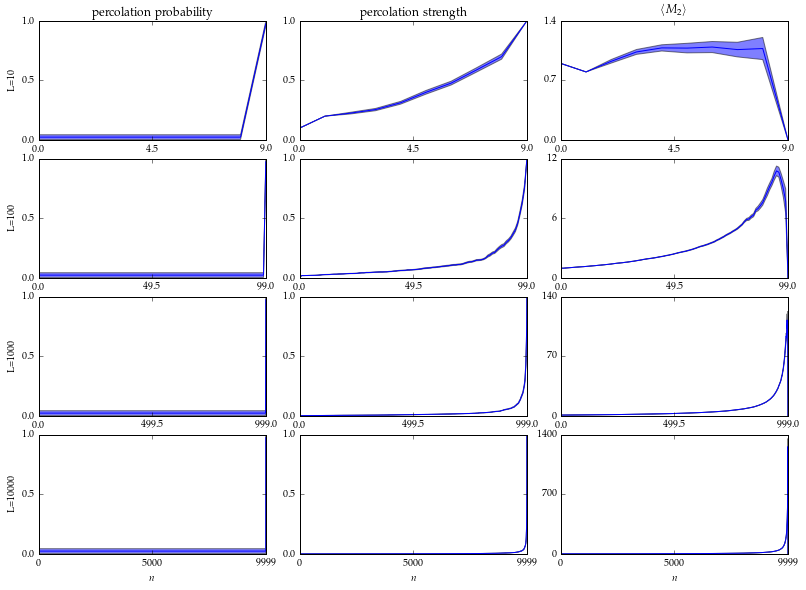

In [14]:
fig, axes = plt.subplots(nrows=len(ls_1d), ncols=3, squeeze=True, figsize=(11.0, 8.0))
for l_index, l in enumerate(ls_1d):
    avg_arrays = microcanonical_averages_arrays_1d[l_index]
    
    line, = axes[l_index, 0].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster'],
        rasterized=True,
    )
    axes[l_index, 0].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster_ci'].T[1],
        avg_arrays['spanning_cluster_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    line, = axes[l_index, 1].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size'],
        rasterized=True,
    )    
    axes[l_index, 1].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size_ci'].T[1],
        avg_arrays['max_cluster_size_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    axes[l_index, 2].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments'][2],
        rasterized=True,
    )        
    axes[l_index, 2].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments_ci'][2].T[1],
        avg_arrays['moments_ci'][2].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    axes[l_index, 1].set_ylim(ymax=1.0)
    axes[l_index, 2].set_ylim(ymin=0.0)
    
    for ax in axes[l_index, :]:
        num_edges = avg_arrays['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'percolation strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
#    ax.set_ylim(ymin=0.0)
    
plt.tight_layout(0)
plt.show()

## Microcanonical ensemble averages of bond percolation on square grids

In [15]:
runs = 40
ls = [3, 10, 32, 100, 316]

In [16]:
graphs = [ percolate.spanning_2d_grid(l) for l in ls ]
microcanonical_averages = [
    percolate.microcanonical_averages(graph=graph, runs=runs) for graph in graphs
]
microcanonical_averages_arrays = [
    percolate.microcanonical_averages_arrays(avg) for avg in microcanonical_averages
]

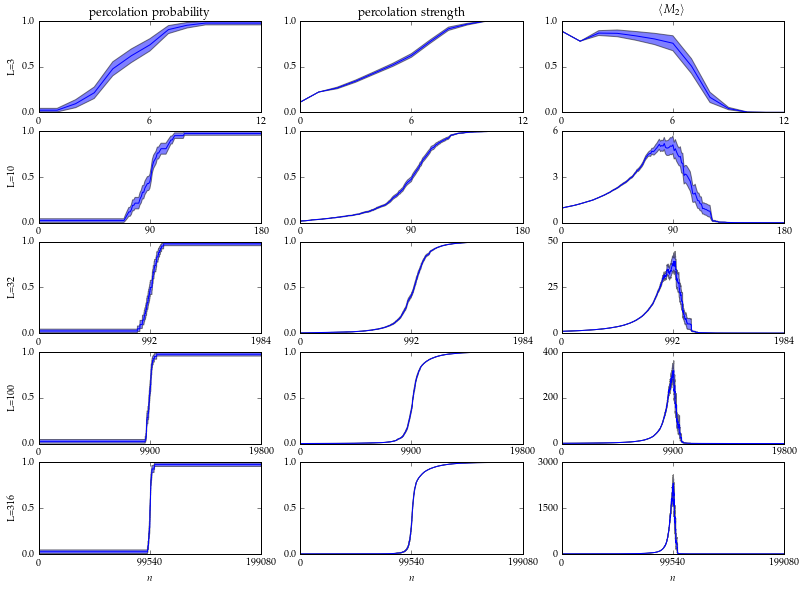

In [17]:
fig, axes = plt.subplots(nrows=len(ls), ncols=3, squeeze=True, figsize=(11.0, 8.0))
for l_index, l in enumerate(ls):
    avg_arrays = microcanonical_averages_arrays[l_index]
    
    line, = axes[l_index, 0].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster'],
        rasterized=True,
    )
    axes[l_index, 0].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster_ci'].T[1],
        avg_arrays['spanning_cluster_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    line, = axes[l_index, 1].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size'],
        rasterized=True,
    )    
    axes[l_index, 1].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size_ci'].T[1],
        avg_arrays['max_cluster_size_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    axes[l_index, 2].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments'][2],
        rasterized=True,
    )        
    axes[l_index, 2].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments_ci'][2].T[1],
        avg_arrays['moments_ci'][2].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    axes[l_index, 1].set_ylim(ymax=1.0)
    axes[l_index, 2].set_ylim(ymin=0.0)
    
    for ax in axes[l_index, :]:
        num_edges = avg_arrays['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'percolation strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
#    ax.set_ylim(ymin=0.0)
    
plt.tight_layout(0)
plt.show()

## Canonical ensemble averages of bond percolation on the linear chain

In [18]:
ps_arrays_1d = [ np.linspace(1.0 - x, 1.0, num=100) for x in [1.0, 0.1, 0.01] ]

In [20]:
stats_1d = [ [
    percolate.canonical_averages(ps, avg_arrays)
    for avg_arrays in microcanonical_averages_arrays_1d
    ]
    for ps in ps_arrays_1d
]

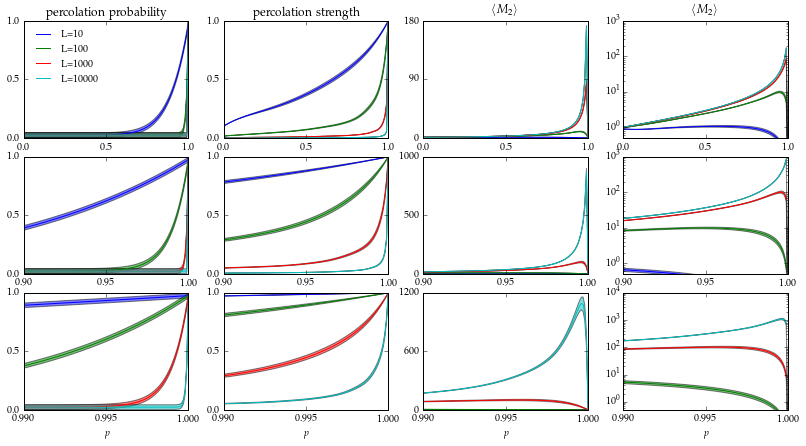

In [21]:
fig, axes = plt.subplots(nrows=len(ps_arrays_1d), ncols=4, squeeze=True, figsize=(11.0, 6.0))
for ps_index, ps in enumerate(ps_arrays_1d):
    for l_index, l in enumerate(ls_1d):
        my_stats = stats_1d[ps_index][l_index]
    
        line, = axes[ps_index, 0].plot(
            ps,
            my_stats['spanning_cluster'],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 0].fill_between(
            ps,
            my_stats['spanning_cluster_ci'].T[1],
            my_stats['spanning_cluster_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
    
        line, = axes[ps_index, 1].plot(
            ps,
            my_stats['max_cluster_size'],
            rasterized=True,
            label=r'L={}'.format(l),
        )    
        axes[ps_index, 1].fill_between(
            ps,
            my_stats['max_cluster_size_ci'].T[1],
            my_stats['max_cluster_size_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 2].plot(
            ps,
            my_stats['moments'][2],
            rasterized=True,
            label=r'L={}'.format(l),
        )        
        axes[ps_index, 2].fill_between(
            ps,
            my_stats['moments_ci'][2].T[1],
            my_stats['moments_ci'][2].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
        axes[ps_index, 3].semilogy(
            ps,
            my_stats['moments'][2],
            rasterized=True,
        )        
        axes[ps_index, 3].fill_between(
            ps,
            np.where(my_stats['moments_ci'][2].T[1] > 0.0, my_stats['moments_ci'][2].T[1], 0.01),
            np.where(my_stats['moments_ci'][2].T[0] > 0.0, my_stats['moments_ci'][2].T[0], 0.01),
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
    
    axes[ps_index, 0].set_ylim(ymax=1.0)
    axes[ps_index, 1].set_ylim(ymax=1.0)
    axes[ps_index, 2].set_ylim(ymin=0.0)
    axes[ps_index, 3].set_ylim(ymin=0.5)
    
    for ax in axes[ps_index, :]:
        ax.set_xlim(xmin=ps.min(), xmax=ps.max())
        ax.set_xticks(np.linspace(ps.min(), ps.max(), num=3))
        
    for ax in axes[ps_index, :-1]:
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'percolation strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')
axes[0, 3].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$p$')
#    ax.set_ylim(ymin=0.0)

axes[0, 0].legend(frameon=False, loc='best')

plt.tight_layout(0)
plt.show()

## Canonical ensemble averages of bond percolation on square grids

In [22]:
ps_arrays = [ np.linspace(0.5 - x, 0.5 + x, num=100) for x in [0.5, 0.05] ]

In [23]:
stats = [ [
    percolate.canonical_averages(ps, avg_arrays)
    for avg_arrays in microcanonical_averages_arrays
    ]
    for ps in ps_arrays
]

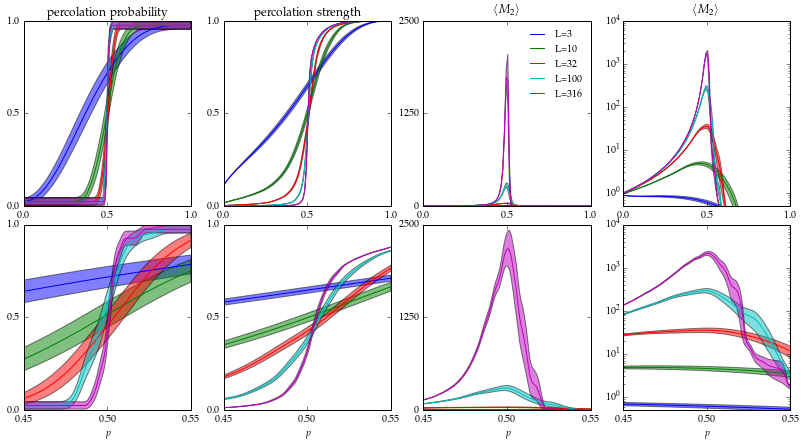

In [24]:
fig, axes = plt.subplots(nrows=len(ps_arrays), ncols=4, squeeze=True, figsize=(11.0, 6.0))
for ps_index, ps in enumerate(ps_arrays):
    for l_index, l in enumerate(ls):
        my_stats = stats[ps_index][l_index]
    
        line, = axes[ps_index, 0].plot(
            ps,
            my_stats['spanning_cluster'],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 0].fill_between(
            ps,
            my_stats['spanning_cluster_ci'].T[1],
            my_stats['spanning_cluster_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
    
        line, = axes[ps_index, 1].plot(
            ps,
            my_stats['max_cluster_size'],
            rasterized=True,
            label=r'L={}'.format(l),
        )    
        axes[ps_index, 1].fill_between(
            ps,
            my_stats['max_cluster_size_ci'].T[1],
            my_stats['max_cluster_size_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 2].plot(
            ps,
            my_stats['moments'][2],
            rasterized=True,
            label=r'L={}'.format(l),
        )        
        axes[ps_index, 2].fill_between(
            ps,
            my_stats['moments_ci'][2].T[1],
            my_stats['moments_ci'][2].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
        axes[ps_index, 3].semilogy(
            ps,
            my_stats['moments'][2],
            rasterized=True,
        )        
        axes[ps_index, 3].fill_between(
            ps,
            np.where(my_stats['moments_ci'][2].T[1] > 0.0, my_stats['moments_ci'][2].T[1], 0.01),
            np.where(my_stats['moments_ci'][2].T[0] > 0.0, my_stats['moments_ci'][2].T[0], 0.01),
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
    
    axes[ps_index, 0].set_ylim(ymax=1.0)
    axes[ps_index, 1].set_ylim(ymax=1.0)
    axes[ps_index, 2].set_ylim(ymin=0.0)
    axes[ps_index, 3].set_ylim(ymin=0.5)
    
    for ax in axes[ps_index, :]:
        ax.set_xlim(xmin=ps.min(), xmax=ps.max())
        ax.set_xticks(np.linspace(ps.min(), ps.max(), num=3))
        
    for ax in axes[ps_index, :-1]:
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'percolation strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')
axes[0, 3].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$p$')
#    ax.set_ylim(ymin=0.0)

axes[0, 2].legend(frameon=False, loc='upper right')

plt.tight_layout(0)
plt.show()